## 3d 

In [89]:
import numpy as np
from kymatio import Scattering2D
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform

In [90]:
# Load the NIfTI file
month1 = nib.load('anita_1.nii')
month1_data = month1.get_fdata()
month1_data = month1_data/np.max(month1_data)

month3 = nib.load('anita_3.nii')
month3_data = month3.get_fdata()
month3_data = month3_data/np.max(month3_data)

In [91]:
resize_scale = 4
M,N,O = np.array(month1_data.shape) // resize_scale
print(M,N,O)

60 100 100


In [92]:
m1_ds =month1_data[::resize_scale,::resize_scale,::resize_scale]
m3_ds =month3_data[::resize_scale,::resize_scale,::resize_scale]

In [93]:
m1x, m1y, m1z = M,N,O
m1constraints = {}
for i in range(m1x):
    if np.count_nonzero(m1_ds[i,:,:]):
        m1constraints['x']=[i]
        break
for i in range(m1x-1,0,-1):
    if np.count_nonzero(m1_ds[i,:,:]):
        m1constraints['x'].append(i)
        break
for i in range(m1y):
    if np.count_nonzero(m1_ds[:,i,:]):
        m1constraints['y']=[i]
        break
for i in range(m1y-1,0,-1):
    if np.count_nonzero(m1_ds[:,i,:]):
        m1constraints['y'].append(i)
        break
for i in range(m1z):
    if np.count_nonzero(m1_ds[:,:,i]):
        m1constraints['z']=[i]
        break
for i in range(m1z-1,0,-1):
    if np.count_nonzero(m1_ds[:,:,i]):
        m1constraints['z'].append(i)
        break

In [94]:
m3x, m3y, m3z = M,N,O
m3constraints = {}
for i in range(m3x):
    if np.count_nonzero(m3_ds[i,:,:]):
        m3constraints['x']=[i]
        break
for i in range(m3x-1,0,-1):
    if np.count_nonzero(m3_ds[i,:,:]):
        m3constraints['x'].append(i)
        break
for i in range(m3y):
    if np.count_nonzero(m3_ds[:,i,:]):
        m3constraints['y']=[i]
        break
for i in range(m3y-1,0,-1):
    if np.count_nonzero(m3_ds[:,i,:]):
        m3constraints['y'].append(i)
        break
for i in range(m3z):
    if np.count_nonzero(m3_ds[:,:,i]):
        m3constraints['z']=[i]
        break
for i in range(m3z-1,0,-1):
    if np.count_nonzero(m3_ds[:,:,i]):
        m3constraints['z'].append(i)
        break

In [95]:
print(m1constraints)
print(m3constraints)

{'x': [0, 59], 'y': [0, 98], 'z': [0, 98]}
{'x': [0, 59], 'y': [0, 99], 'z': [0, 99]}


In [96]:
img1 = m1_ds[:,:,O//2]
img2 = m3_ds[:,:,O//2]
S = Scattering2D(J=2, shape=img1.shape)

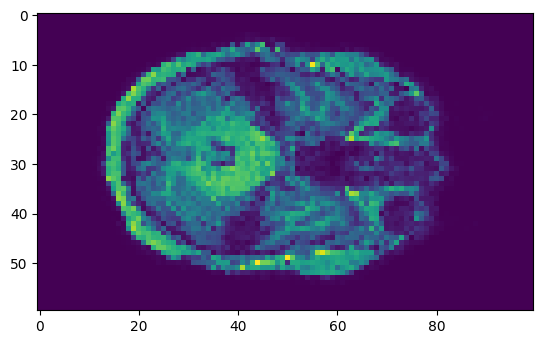

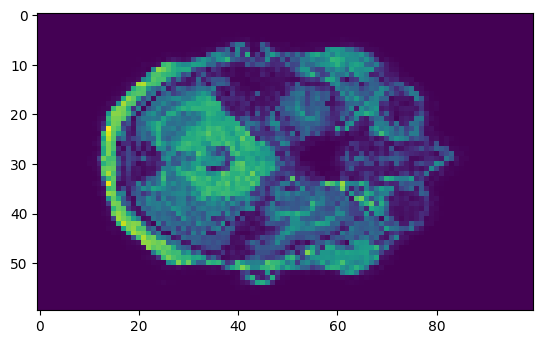

In [97]:
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

In [98]:
S1 = S(img1)
S2 = S(img2)

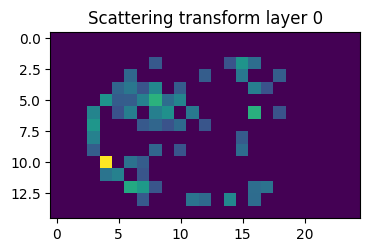

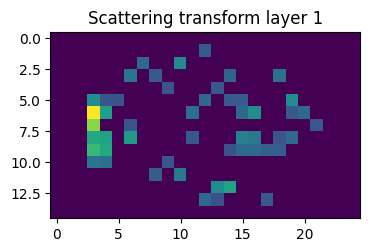

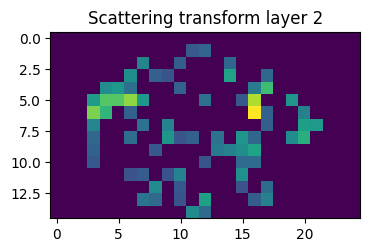

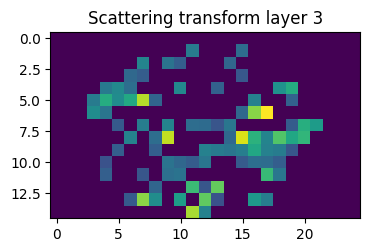

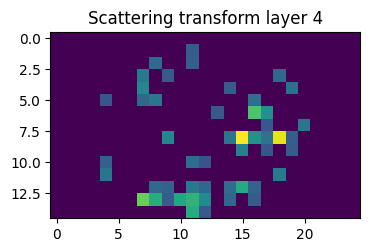

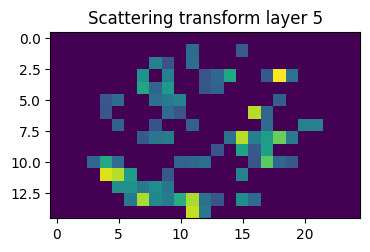

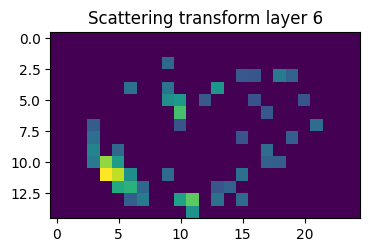

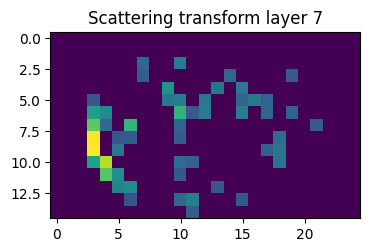

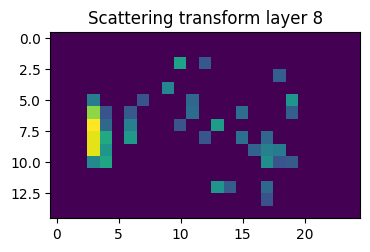

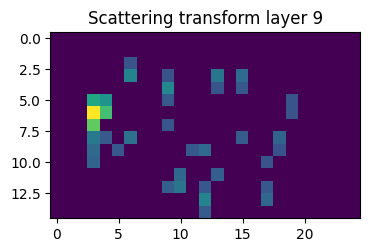

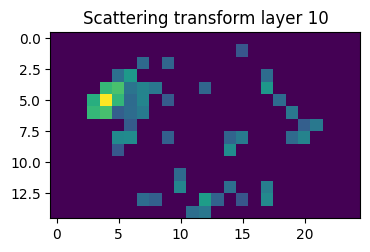

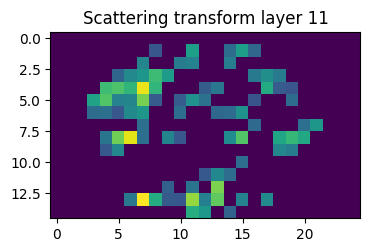

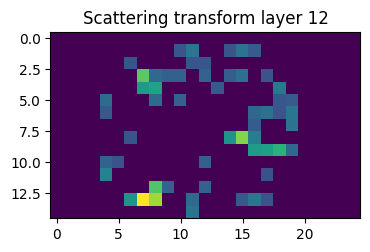

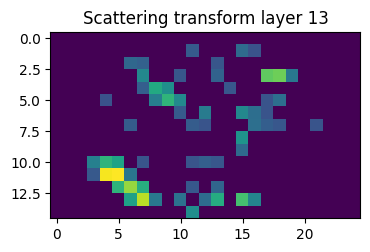

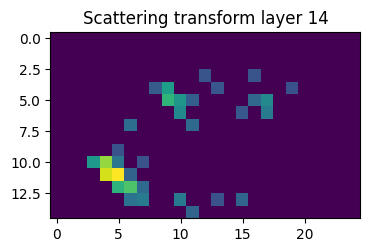

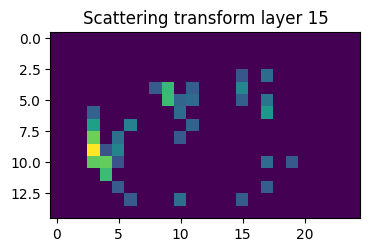

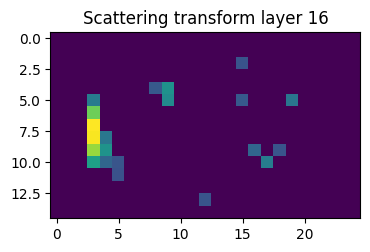

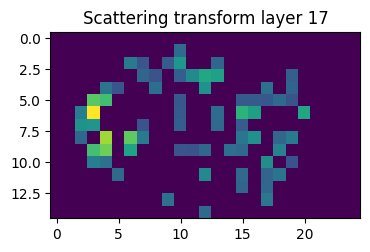

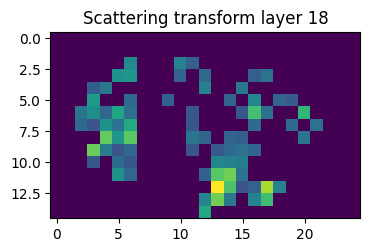

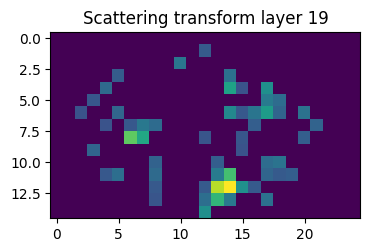

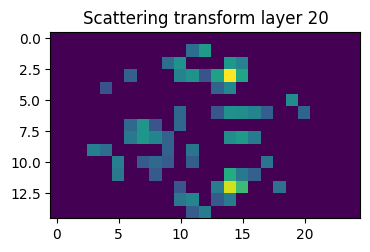

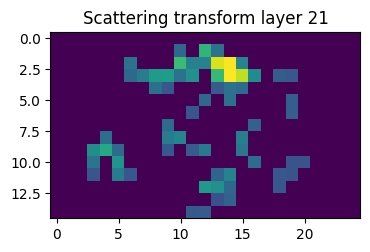

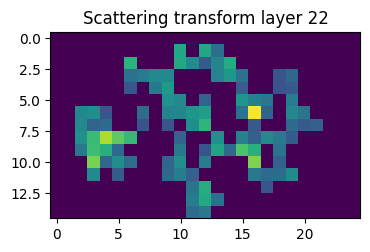

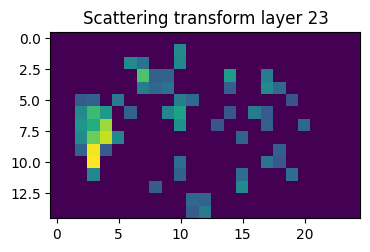

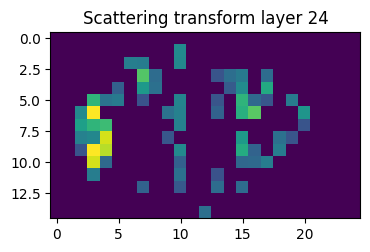

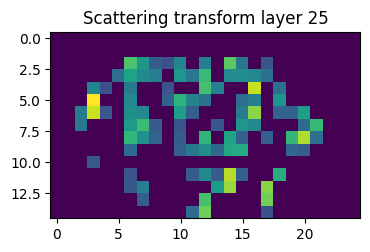

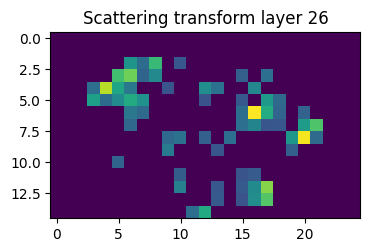

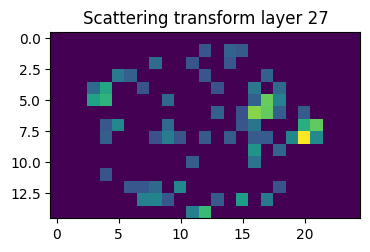

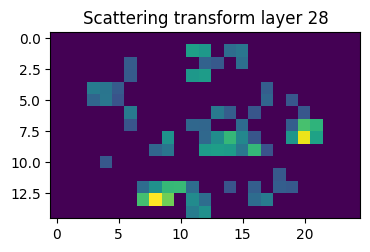

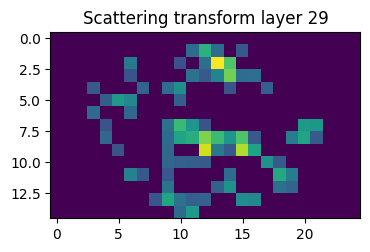

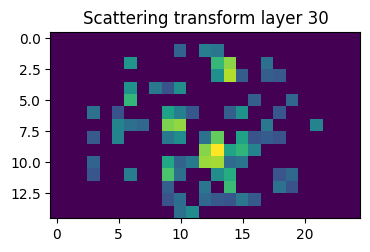

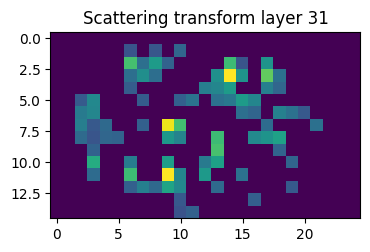

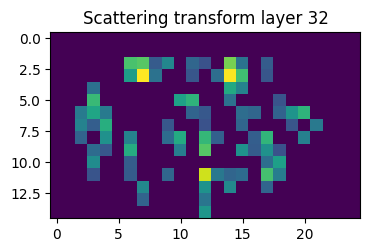

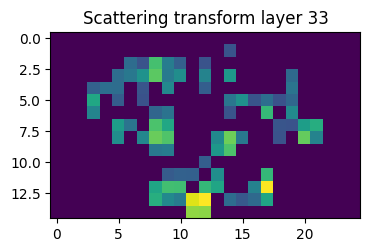

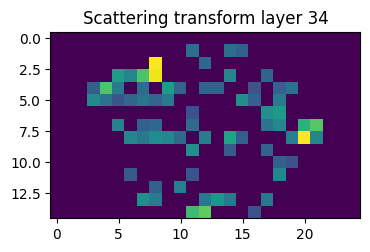

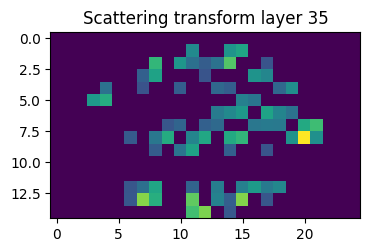

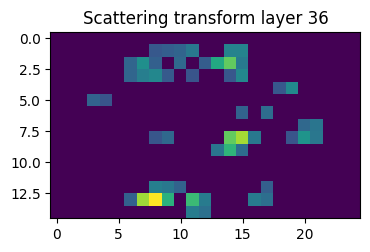

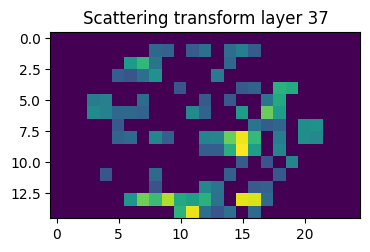

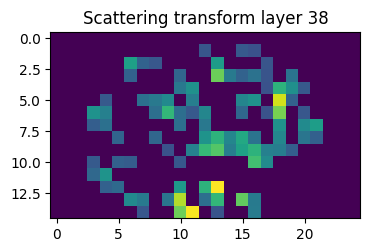

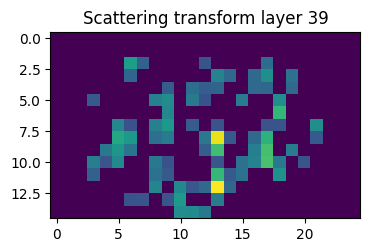

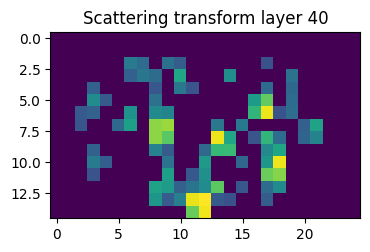

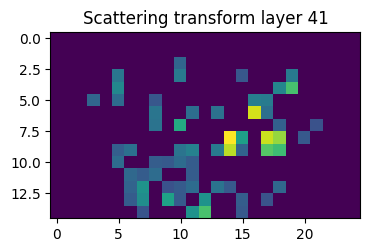

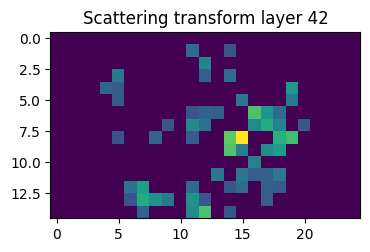

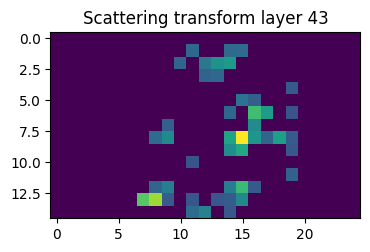

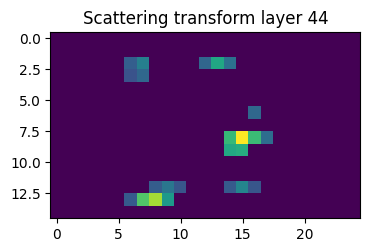

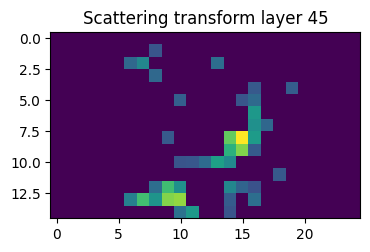

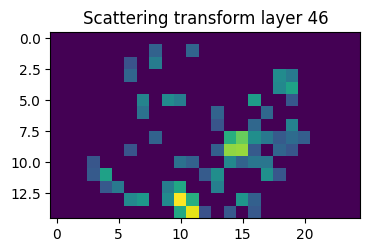

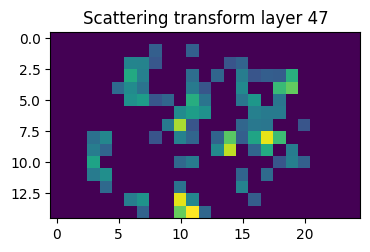

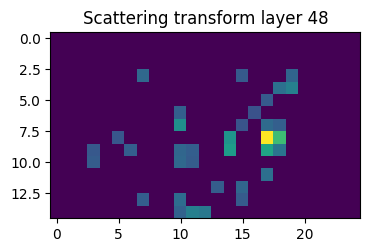

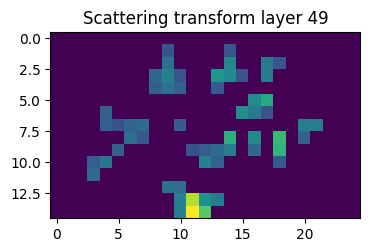

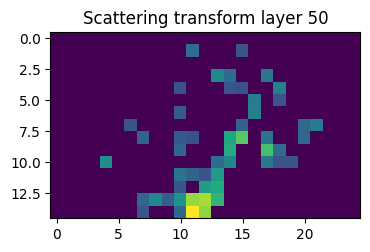

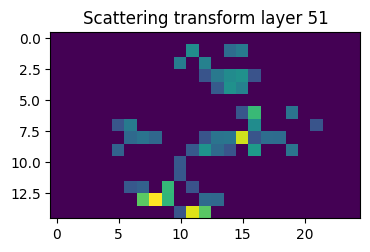

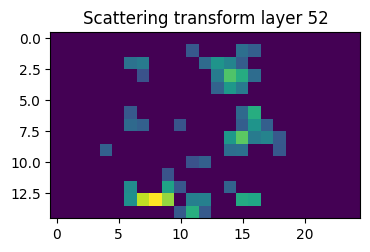

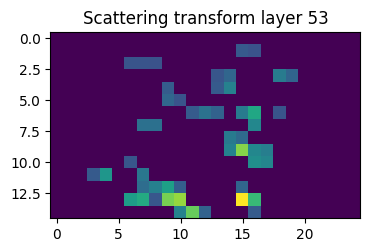

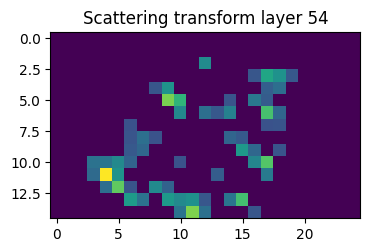

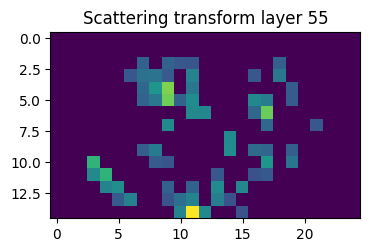

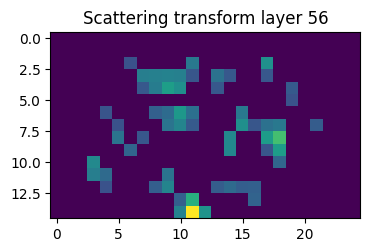

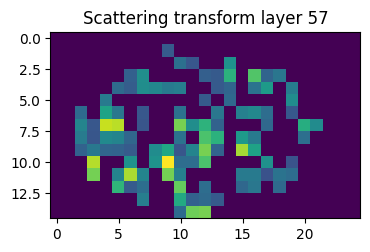

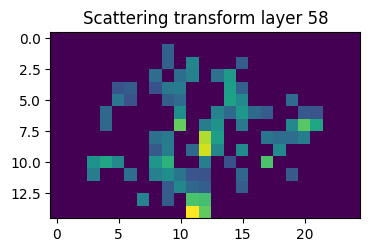

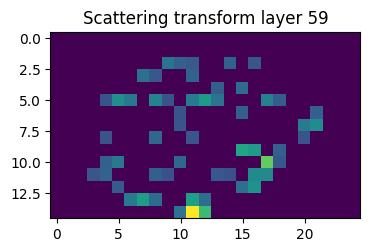

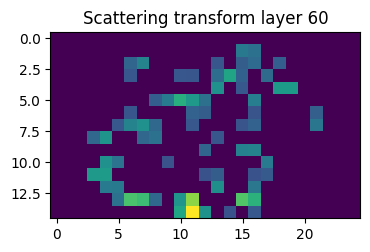

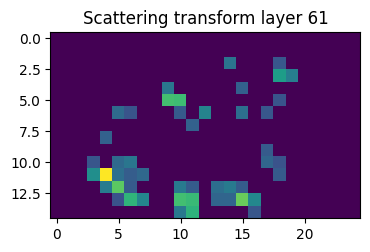

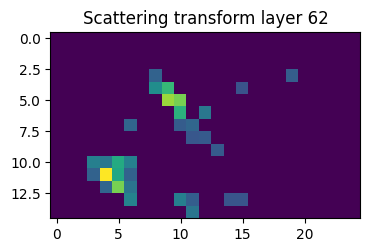

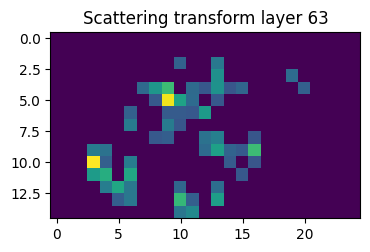

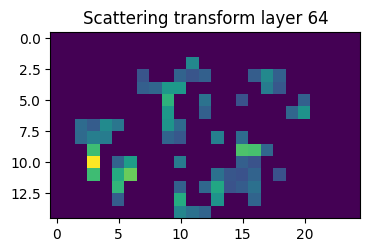

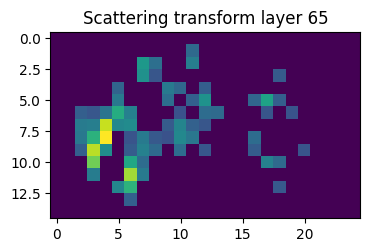

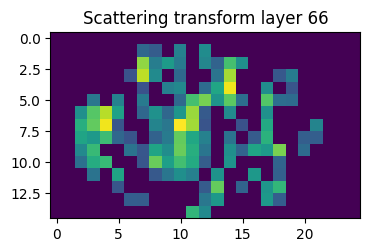

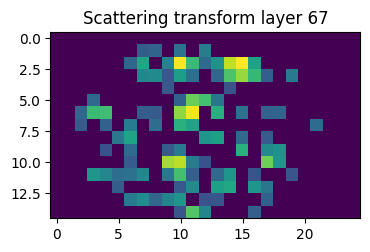

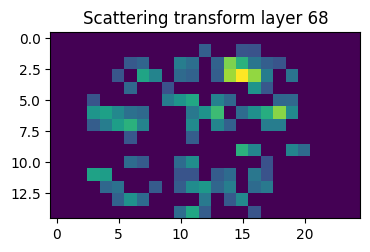

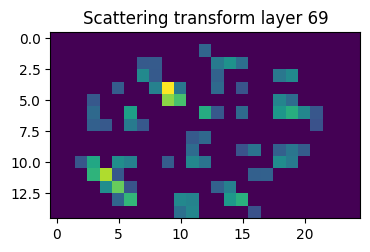

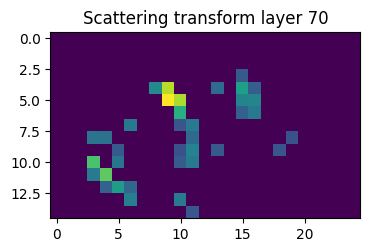

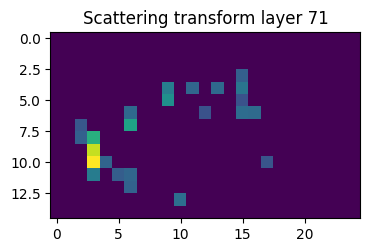

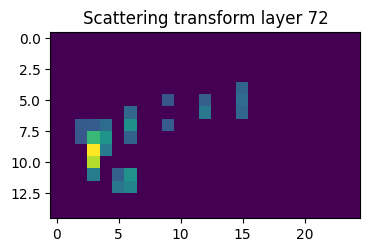

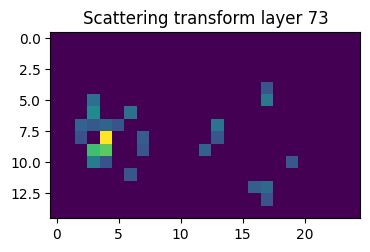

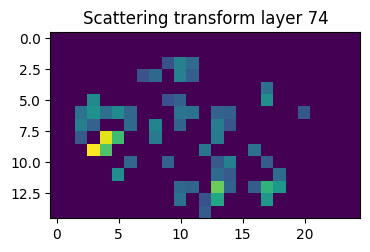

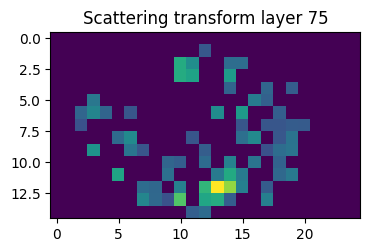

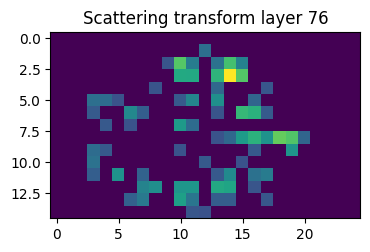

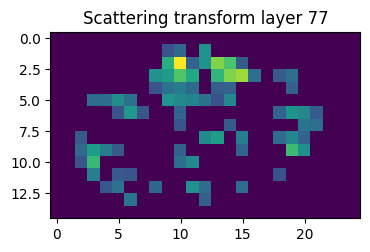

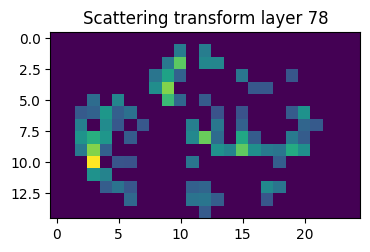

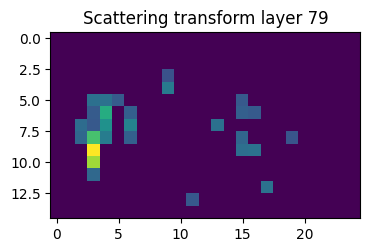

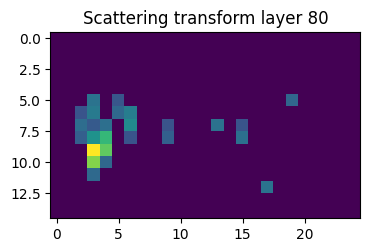

In [99]:
for i in range(S1.shape[0]):
    plt.figure(figsize=(4,4))
    tx = np.abs(S1[i]-S2[i])
    tx = tx/np.max(tx)
    tx2 = np.where(tx>0.25, tx, 0)
    # tx2 = np.round(tx)
    plt.imshow(tx2)
    plt.title('Scattering transform layer {}'.format(i))
    plt.show()